In [52]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [30]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [31]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [32]:
print(knr.predict([[50]]))

[1033.33333333]


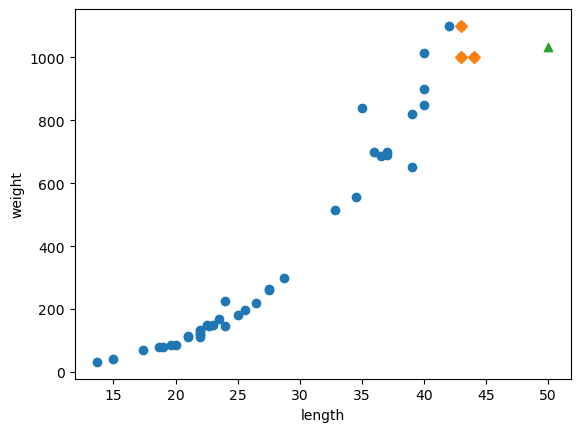

In [33]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
print(np.mean(train_target[indexes]))

1033.3333333333333


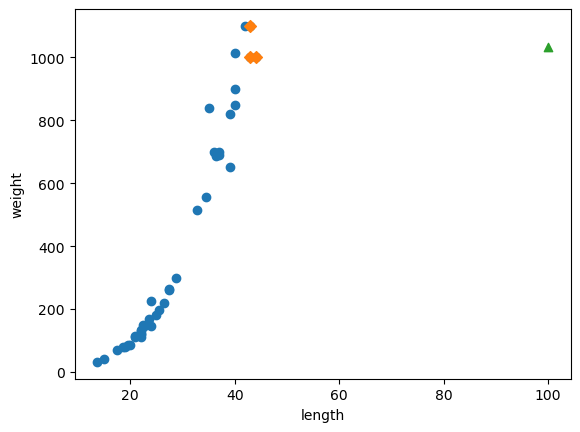

In [35]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [37]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [39]:
print(lr.predict([[100]]))

[3192.69585141]


In [40]:
# coef는 기울기, intercept는 y절편 
# y= 39.01714496x -709.0186449535477
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


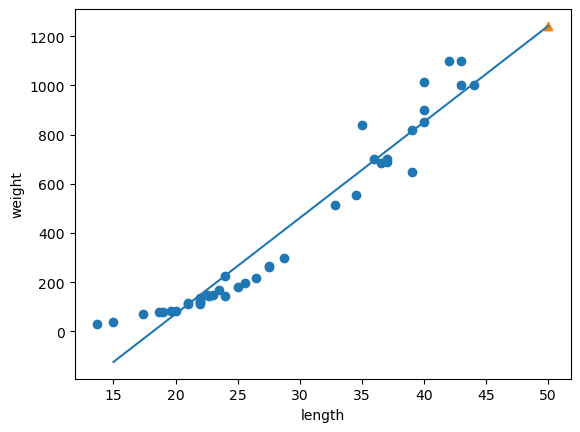

In [44]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [45]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [46]:
# 그래프가 곡선형태를 띄기 때문에 다항 회귀로 가져다가 사용해본것.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [47]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [48]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [49]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [50]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


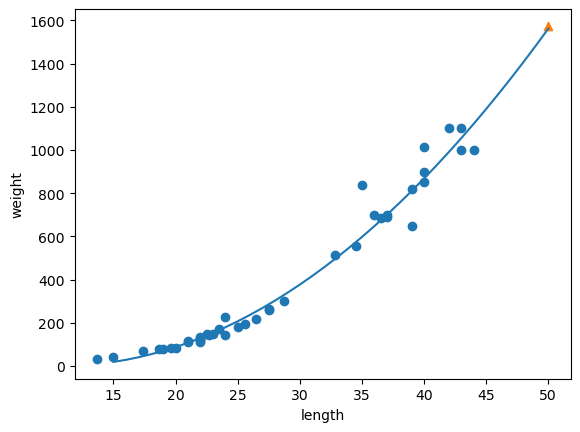

In [54]:
point = np.arange(15,51)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
